<a href="https://colab.research.google.com/github/srujannayak32/MLLAB189/blob/main/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv("/content/drive/MyDrive/MLLAB DATASETS/assignment-2.csv")
df.head()
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
print(df.isnull().sum())
df.dropna(inplace=True)

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [4]:
# Encode diagnosis: M = 1, B = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features (important for SVM/KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Random Forest baseline
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Accuracy (Baseline):", accuracy_score(y_test, y_pred_rf))

# SVM baseline
svm = SVC(random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("SVM Accuracy (Baseline):", accuracy_score(y_test, y_pred_svm))

Random Forest Accuracy (Baseline): 0.9736842105263158
SVM Accuracy (Baseline): 0.9736842105263158


In [8]:
# Parameters to tune
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                       param_grid=rf_params,
                       cv=5,
                       scoring='accuracy')
grid_rf.fit(X_train_scaled, y_train)

# Best parameters and model
print("Best RF params:", grid_rf.best_params_)
best_rf = grid_rf.best_estimator_

# Evaluate
y_pred_best_rf = best_rf.predict(X_test_scaled)
print("Random Forest Accuracy (Tuned):", accuracy_score(y_test, y_pred_best_rf))
print(classification_report(y_test, y_pred_best_rf))


Best RF params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Accuracy (Tuned): 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [9]:
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']}

grid_svm = GridSearchCV(SVC(random_state=42),
                        param_grid=svm_params,
                        cv=5,
                        scoring='accuracy')
grid_svm.fit(X_train_scaled, y_train)

print("Best SVM params:", grid_svm.best_params_)
best_svm = grid_svm.best_estimator_

y_pred_best_svm = best_svm.predict(X_test_scaled)
print("SVM Accuracy (Tuned):", accuracy_score(y_test, y_pred_best_svm))
print(classification_report(y_test, y_pred_best_svm))


Best SVM params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
SVM Accuracy (Tuned): 0.9736842105263158
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



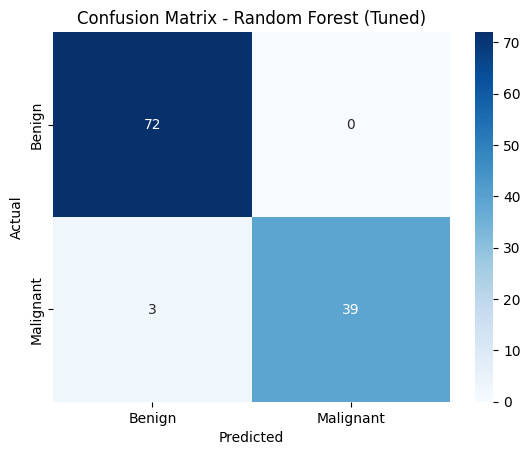

In [10]:
# Confusion matrix for best RF
cm = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])
plt.title("Confusion Matrix - Random Forest (Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


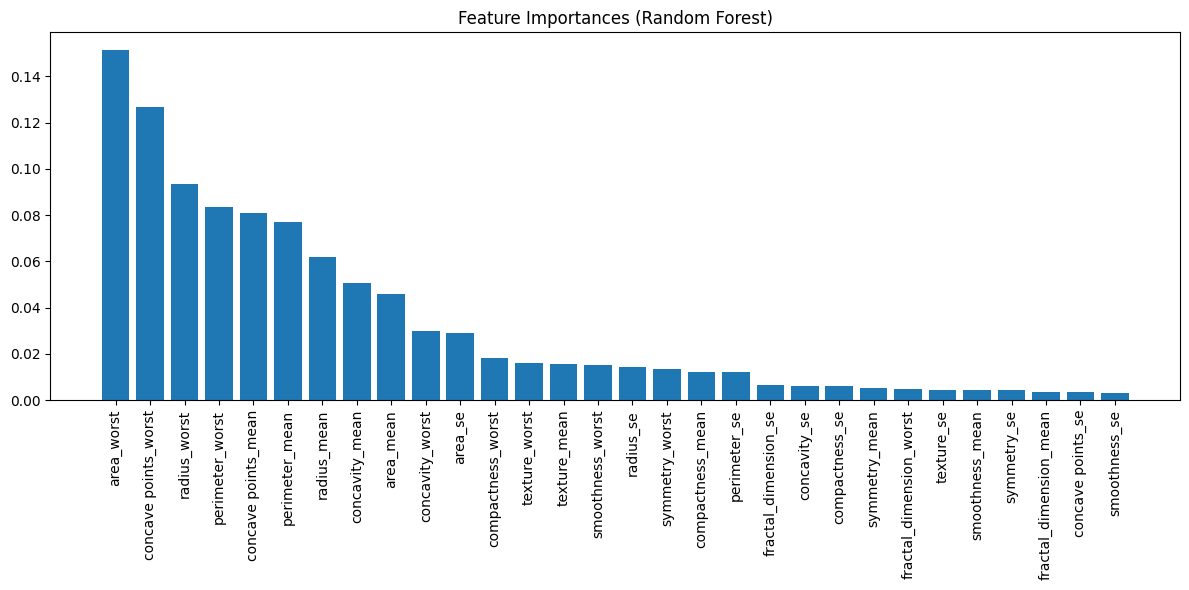

In [11]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()
